In [62]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time

### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# import sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

import re
import os


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Dataset prep

In [115]:
# merge all datasets to create master_df

root = os.path.dirname(os.path.dirname(os.getcwd()))

df_aq = pd.read_csv(root + "/data/cleaned/air_quality_NO2.csv", index_col=0)[['value','latitude', 'longitude']]
df_met = pd.read_csv(root + "/data/cleaned/nO2_met.csv", index_col=0)
df_fac = pd.read_csv(root + "/data/cleaned/no2_fac_data.csv", index_col=0)
df_traffic = pd.read_csv(root + "/data/cleaned/intersection_final.csv", index_col=0)

df_m1 = df_aq.merge(df_met, on = ['latitude', 'longitude'], how = 'inner')
df_m2 = df_m1.merge(df_fac, on = ['latitude', 'longitude'], how = 'inner')
df_merged = df_m2.merge(df_traffic, on = ['latitude', 'longitude'], how = 'inner')
df_merged.drop(columns = ['latitude', 'longitude'], inplace=True)

## Feature selection

In [117]:
# create feature list and scale
feature_df = df_merged.drop(columns = ['value'])

feature_df_scaled = pd.DataFrame(StandardScaler().fit_transform(feature_df), index = feature_df.index, columns = feature_df.columns)

df_merged_scaled = pd.concat([df_merged['value'], feature_df_scaled], axis = 1)

In [118]:
# ols fit on individual features

r2 = []
for column in feature_df.columns[0:]:
    r2_val = sm.OLS(df_merged['value'], feature_df[column]).fit().rsquared
    r2.append(r2_val)
r2_score_df = pd.DataFrame({'Feature': feature_df.columns, 'Individual_R2':r2})


r2_score_df.sort_values('Individual_R2', ascending = False)

,Feature,Individual_R2
0,prcp,0.756036
34,11765311-Airport-low_dist,0.749319
74,12026411-Airport-low_dist,0.749319
102,12254111-Airport-low_dist,0.749319
110,12257011-Airport-low_dist,0.749319
8,10999611-Airport-low_dist,0.749319
58,11892511-Airport-low_dist,0.749319
32,11746411-Airport-low_dist,0.749319
98,12253511-Airport-low_dist,0.749319
94,12208711-Airport-low_dist,0.749319


In [119]:
# identifying all the features that have a correlation higher than 0.90 or lower than -0.90 indicating a strong positive or negative correlation
threshold_1 = 0.90
threshold_2 = -0.90

def features_high_corr(df_features_corr):
    columns = np.full((df_features_corr.shape[0],), True, dtype=bool)
    for i in range(df_features_corr.shape[0]):
        for j in range(i+1, df_features_corr.shape[0]):
            if (df_features_corr.iloc[i,j] >= threshold_1) | (df_features_corr.iloc[i,j] <= threshold_2) :
                if columns[j]:
                    columns[j] = False
    selected_columns = df_features_corr.columns[columns]
    return selected_columns

In [120]:
# list of features that are not highly correlated
features_corr = feature_df.corr()
features_OLS = features_high_corr(features_corr)
print("Features in BC dataset that are not highly correlated: ")
print(features_OLS)

Features in BC dataset that are not highly correlated: 
Index(['prcp', 'swe', 'tmin', 'number_intersections'], dtype='object')


In [121]:
#Create a dataframe with air quality value and selected columns from above
OLS_df = df_merged[['value']].join(df_merged[list(features_OLS)])

module://matplotlib_inline.backend_inline


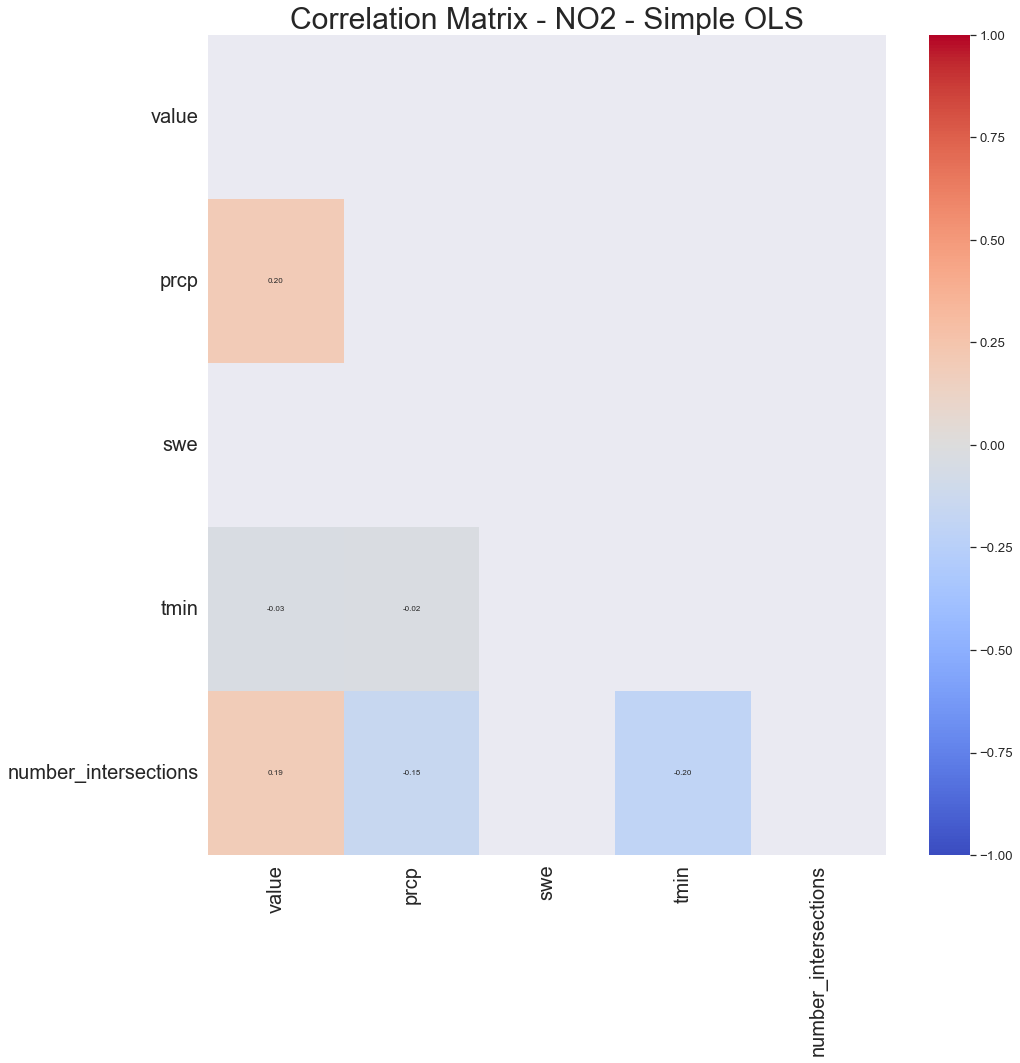

In [122]:
## Plot Correlation matrix
OLS_df_corr = OLS_df.corr()
features_corr_mat = OLS_df_corr.values

print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
features_corr_mat[np.triu_indices_from(features_corr_mat)] = np.nan

fig, ax = plt.subplots(figsize=(15, 15))

hm = sns.heatmap(features_corr_mat, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')

ticks = np.arange(OLS_df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(OLS_df_corr.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(OLS_df_corr.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - NO2 - Simple OLS', fontsize  = 30)
plt.tight_layout()

In [123]:
# fitting OLS model on the shortlisted features
OLS_corr_model = sm.OLS(df_merged['value'], feature_df[features_OLS])
OLS_corr_results = OLS_corr_model.fit() 
OLS_corr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          1.272e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):                        0.00
Time:                        16:25:25   Log-Likelihood:                          68164.
No. Observations:               11314   AIC:                                 -1.363e+05
Df Residuals:                   11311   BIC:                                 -1.363e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
prcp                     0.0004   1.75e-05     25.327      0.000       0.000       0.000
swe                   3.458e-20   1.22e-21     28.438      0.000    3.22e-20     3.7e-20
tmin                    -0.0001   7.13e-06    -17.016      0.000      -0.000      -0.000
number_intersections  5.117e-05    2.1e-06     24.419      0.000    4.71e-05    5.53e-05
==============================================================================
Omnibus:                     6954.387   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75242.644
Skew:                           2.843   Prob(JB):                         0.00
Kurtosis:                      14.282   Cond. No.                     2.50e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
# R2, Coefficient and Intercept
print("The R2 is {}".format(OLS_corr_results.rsquared), "The R2 tells us that there is a correlation between the features identified and concentration. ")

The R2 is 0.7713786069962674 The R2 tells us that there is a correlation between the features identified and concentration. 
